In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp
import numpy as np

In [ ]:
path = ('/content/BreastCancerCoimbra.csv')

In [ ]:
bc = pd.read_csv(path)

In [ ]:
print("data: ", bc.shape)

data:  (116, 10)


In [ ]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          116 non-null    int64  
 1   BMI          116 non-null    float64
 2   GLUCOSE      116 non-null    int64  
 3   INSULIN      116 non-null    float64
 4   HOMA         116 non-null    float64
 5   LEPTIN       116 non-null    float64
 6   ADIPONECTIN  116 non-null    float64
 7   RESISTIN     116 non-null    float64
 8   MCP.1        116 non-null    float64
 9   CLASS        116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
bc.head()

,AGE,BMI,GLUCOSE,INSULIN,HOMA,LEPTIN,ADIPONECTIN,RESISTIN,MCP.1,CLASS
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
bc.describe()

,AGE,BMI,GLUCOSE,INSULIN,HOMA,LEPTIN,ADIPONECTIN,RESISTIN,MCP.1,CLASS
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [ ]:
x = bc.iloc[:, [0,5]].values
y = bc.iloc[:, -1].values

In [ ]:
x

array([[48.    ,  8.8071],
       [83.    ,  8.8438],
       [82.    , 17.9393],
       [68.    ,  9.8827],
       [86.    ,  6.6994],
       [49.    ,  6.8317],
       [89.    ,  6.964 ],
       [76.    ,  4.311 ],
       [73.    ,  4.47  ],
       [75.    , 17.127 ],
       [34.    , 14.57  ],
       [29.    , 35.59  ],
       [25.    , 20.45  ],
       [24.    ,  8.88  ],
       [38.    , 15.26  ],
       [44.    , 14.09  ],
       [47.    , 26.65  ],
       [61.    , 30.7729],
       [64.    , 21.2117],
       [32.    , 49.3727],
       [36.    , 15.1248],
       [34.    , 28.7502],
       [29.    , 45.6196],
       [35.    , 39.2134],
       [54.    , 12.331 ],
       [45.    , 39.9802],
       [50.    , 46.6401],
       [66.    , 45.9624],
       [35.    , 50.6094],
       [36.    , 10.2809],
       [66.    , 74.7069],
       [53.    , 27.1841],
       [28.    , 68.5102],
       [43.    , 31.2128],
       [51.    , 20.092 ],
       [67.    , 21.9033],
       [66.    , 16.2247],
 

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [ ]:
len(x_train)

87

In [ ]:
len(x_test)

29

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.59958074  0.7424714 ]
 [-0.97895182  0.17424292]
 [ 0.475304   -0.14939306]
 [ 0.60176103 -0.91000469]
 [ 0.66498955  0.88889751]
 [ 1.92955983 -1.0583675 ]
 [-0.59958074 -0.84098018]
 [ 1.73987429  3.17673566]
 [-0.59958074  1.19727886]
 [ 0.475304   -0.65453926]
 [-0.91572331 -0.76803144]
 [ 1.48696023  0.19622768]
 [-0.47312371 -1.00487718]
 [ 0.475304    0.9239918 ]
 [ 0.34884697 -0.33413111]
 [-1.86415102  0.39674392]
 [ 0.22238995 -0.91091458]
 [-0.78926628 -0.75815482]
 [ 0.66498955  0.24374017]
 [-0.22020965  0.4797726 ]
 [ 1.10758914 -0.30534505]
 [ 1.55018874 -0.96281386]
 [-0.09375262  0.27328362]
 [ 1.04436063 -0.88421771]
 [ 1.10758914  0.4120443 ]
 [ 1.73987429 -1.0718176 ]
 [-0.91572331 -0.69614001]
 [ 0.15916143  0.151882  ]
 [-0.85249479 -1.02361887]
 [ 1.10758914  0.03949795]
 [ 0.09593292 -0.17715739]
 [-0.59958074 -1.06509255]
 [-0.85249479 -1.01826628]
 [-0.85249479 -0.20012829]
 [ 0.60176103 -0.50399577]
 [-0.66280925 -0.96467939]
 [-0.47312371 -0.39104749]
 

In [ ]:
print(x_test)

[[-1.54800845 -0.67174074]
 [-0.78926628 -0.89590903]
 [-0.28343817 -0.97076396]
 [ 1.17081766 -0.71393115]
 [ 1.10758914 -1.19322429]
 [ 1.73987429  1.00962306]
 [-0.4098952   0.07568512]
 [-1.16863736  0.16538293]
 [-0.78926628 -0.46231368]
 [-0.59958074 -1.09039662]
 [ 0.475304    2.38512678]
 [ 1.48696023 -0.50047312]
 [ 0.09593292  0.51126799]
 [-1.86415102  0.90656665]
 [ 0.66498955 -0.64251245]
 [-1.04218034 -0.78907581]
 [-0.28343817 -0.78555317]
 [ 0.85467509 -0.30524339]
 [-1.29509439 -0.98344141]
 [-1.04218034 -0.44235712]
 [-0.72603777 -0.05769247]
 [-2.18029359 -0.96097375]
 [-0.53635222  0.95844051]
 [-0.66280925 -0.62281513]
 [-0.91572331 -0.48925454]
 [-1.16863736 -0.6843267 ]
 [-0.85249479  1.36712319]
 [ 0.98113212  0.16969347]
 [ 0.9179036  -1.18514203]]


In [ ]:
print(y_train)

[2 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 2 2 2 2 1 1 2 1 1 1 1 1 2 1 1 1 2 2 2 1 1
 1 2 1 1 1 2 2 2 2 1 2 1 2 1 1 1 2 2 2 2 2 2 1 2 2 2 1 1 2 2 1 2 1 2 2 1 2
 2 2 2 1 1 2 1 2 2 2 2 1 1]


In [ ]:
print(y_test)

[1 2 2 1 1 2 2 2 2 2 1 1 2 1 1 2 1 2 2 2 1 1 1 2 2 2 2 2 1]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 9  3]
 [ 3 14]]


In [ ]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test, y_pred)

print(akurasi)

              precision    recall  f1-score   support

           1       0.75      0.75      0.75        12
           2       0.82      0.82      0.82        17

    accuracy                           0.79        29
   macro avg       0.79      0.79      0.79        29
weighted avg       0.79      0.79      0.79        29



In [ ]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test, y_pred)

print("Tingkat akurasi :%d persen"%(akurasi*100))

Tingkat akurasi :79 persen


<ipython-input-25-ad74b81a1f4a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


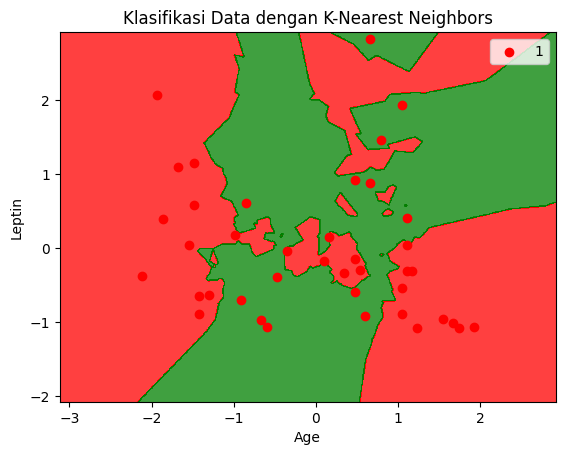

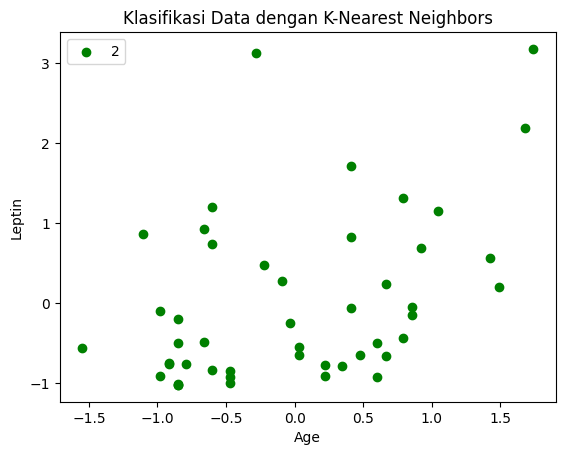

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha =0.75, cmap = ListedColormap (('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('Klasifikasi Data dengan K-Nearest Neighbors')
  plt.xlabel('Age')
  plt.ylabel('Leptin')
  plt.legend()
  plt.show()